<a href="https://colab.research.google.com/github/isagbapeter/Face-Recognition-Model/blob/main/Sequential_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#extract dataset from zip file
from zipfile import ZipFile
Dataset = '/content/KF5012Dataset.zip'

with ZipFile(Dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import cv2
import numpy as np
import os
import shutil
import glob
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
datasetDir = '/content/dataset'

In [ ]:
# Function to load images from the dataset directory
def load_images(datasetDir):
    image_paths = []
    labels = []

    # Loop through each person in the training directory
    for person_dir in os.listdir(datasetDir):
        if os.path.isdir(os.path.join(datasetDir, person_dir)):
            for image_path in glob.glob(os.path.join(datasetDir, person_dir, "*.jpg")):
                image_paths.append(image_path)
                labels.append(person_dir)
    return image_paths, labels


In [ ]:
# Load images and labels
image_paths, labels = load_images(datasetDir)

In [ ]:
#before preprocessing
print(labels)

['pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_Zendaya', 'pins_tom ellis', 'pins_tom ellis', 'pi

In [ ]:
#before preprocessing
print(image_paths)

['/content/dataset/pins_Zendaya/Zendaya83_1918.jpg', '/content/dataset/pins_Zendaya/Zendaya207_1845.jpg', '/content/dataset/pins_Zendaya/Zendaya31_1880.jpg', '/content/dataset/pins_Zendaya/Zendaya55_1896.jpg', '/content/dataset/pins_Zendaya/Zendaya65_1906.jpg', '/content/dataset/pins_Zendaya/Zendaya183_1828.jpg', '/content/dataset/pins_Zendaya/Zendaya61_1902.jpg', '/content/dataset/pins_Zendaya/Zendaya74_1913.jpg', '/content/dataset/pins_Zendaya/Zendaya219_1856.jpg', '/content/dataset/pins_Zendaya/Zendaya208_1846.jpg', '/content/dataset/pins_Zendaya/Zendaya38_1886.jpg', '/content/dataset/pins_Zendaya/Zendaya188_1832.jpg', '/content/dataset/pins_Zendaya/Zendaya7_1910.jpg', '/content/dataset/pins_Zendaya/Zendaya197_1840.jpg', '/content/dataset/pins_Zendaya/Zendaya95_1925.jpg', '/content/dataset/pins_Zendaya/Zendaya5_1890.jpg', '/content/dataset/pins_Zendaya/Zendaya21_1848.jpg', '/content/dataset/pins_Zendaya/Zendaya51_1892.jpg', '/content/dataset/pins_Zendaya/Zendaya220_1858.jpg', '/cont

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.2)

In [ ]:
# Extract features for each image
training_set = train_datagen.flow_from_directory(datasetDir,
                                       target_size=(150, 150),
                                                batch_size=32,
                                     class_mode='categorical',
                                            subset='training')

validation_set = test_datagen.flow_from_directory(datasetDir,
                                        target_size=(150, 150),
                                                 batch_size=32,
                                      class_mode='categorical',
                                               shuffle = False,
                                           subset='validation')

Found 896 images belonging to 20 classes.
Found 217 images belonging to 20 classes.


In [ ]:
print(training_set)

In [ ]:
labels1 = training_set.classes

In [ ]:
print(labels1)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7

In [ ]:
num_classes = 20
# Define the CNN model
CNNmodel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding= 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding= 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding= 'same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with the number of classes
])

In [ ]:
# Compile the model
CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history = CNNmodel.fit(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=100,
                    verbose=1,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

Epoch 1/100
28/28 [==============================] - 14s 269ms/step - loss: 3.0252 - accuracy: 0.0413 - val_loss: 2.9919 - val_accuracy: 0.0507
Epoch 2/100
28/28 [==============================] - 6s 218ms/step - loss: 2.9908 - accuracy: 0.0592 - val_loss: 2.9654 - val_accuracy: 0.0922
Epoch 3/100
28/28 [==============================] - 7s 249ms/step - loss: 2.9690 - accuracy: 0.0737 - val_loss: 2.9264 - val_accuracy: 0.0922
Epoch 4/100
28/28 [==============================] - 5s 190ms/step - loss: 2.9279 - accuracy: 0.0938 - val_loss: 2.8881 - val_accuracy: 0.1060
Epoch 5/100
28/28 [==============================] - 7s 250ms/step - loss: 2.8969 - accuracy: 0.1172 - val_loss: 2.8641 - val_accuracy: 0.1106
Epoch 6/100
28/28 [==============================] - 5s 191ms/step - loss: 2.8710 - accuracy: 0.1094 - val_loss: 2.7694 - val_accuracy: 0.1521
Epoch 7/100
28/28 [==============================] - 5s 194ms/step - loss: 2.8029 - accuracy: 0.1306 - val_loss: 2.7109 - val_accuracy: 0.138

In [ ]:
score = CNNmodel.evaluate(validation_set, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.9279309511184692
Test Accuracy: 0.4285714328289032


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


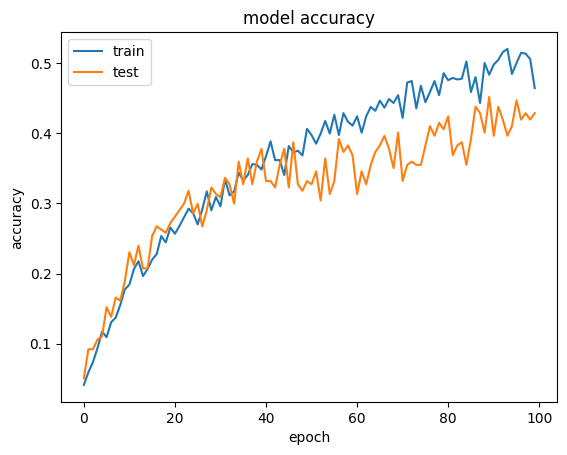

In [ ]:
#plot the model accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

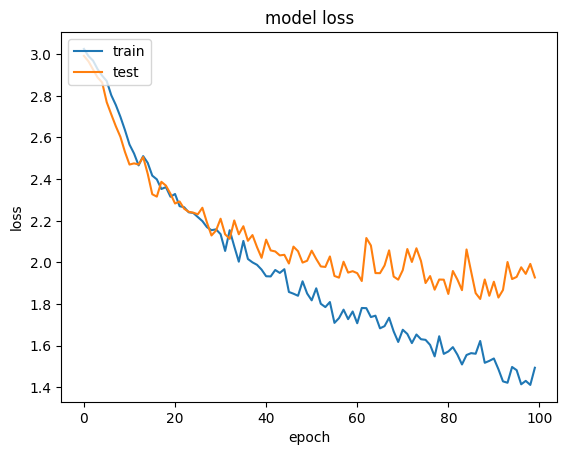

In [ ]:
#plot the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Attempt 2**

In [ ]:
num_classes = 20
# Define the CNN model
CNNmodel1 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    Dropout(0.3),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer with the number of classes
])
# Compile the model
CNNmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history1 = CNNmodel1.fit(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=100,
                    verbose=1,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

Epoch 1/100
28/28 [==============================] - 11s 257ms/step - loss: 3.0060 - accuracy: 0.0536 - val_loss: 2.9947 - val_accuracy: 0.0553
Epoch 2/100
28/28 [==============================] - 10s 341ms/step - loss: 2.9962 - accuracy: 0.0357 - val_loss: 2.9942 - val_accuracy: 0.0553
Epoch 3/100
28/28 [==============================] - 5s 193ms/step - loss: 2.9954 - accuracy: 0.0580 - val_loss: 2.9930 - val_accuracy: 0.0553
Epoch 4/100
28/28 [==============================] - 6s 215ms/step - loss: 2.9926 - accuracy: 0.0681 - val_loss: 2.9940 - val_accuracy: 0.0553
Epoch 5/100
28/28 [==============================] - 6s 222ms/step - loss: 2.9947 - accuracy: 0.0580 - val_loss: 2.9923 - val_accuracy: 0.0553
Epoch 6/100
28/28 [==============================] - 5s 193ms/step - loss: 2.9901 - accuracy: 0.0569 - val_loss: 2.9908 - val_accuracy: 0.0553
Epoch 7/100
28/28 [==============================] - 7s 248ms/step - loss: 2.9853 - accuracy: 0.0670 - val_loss: 2.9785 - val_accuracy: 0.10

In [ ]:
score1 = CNNmodel1.evaluate(validation_set, verbose=0)
print('Test Loss:', score1[0])
print('Test Accuracy:', score1[1])

Test Loss: 1.9723575115203857
Test Accuracy: 0.3870967626571655


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


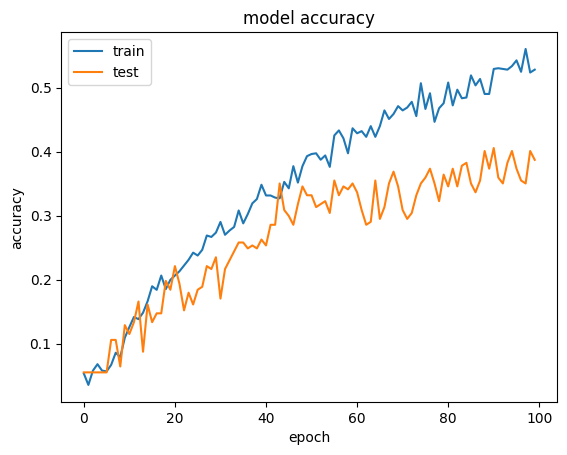

In [ ]:
#plot the model accuracy
print(history1.history.keys())
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

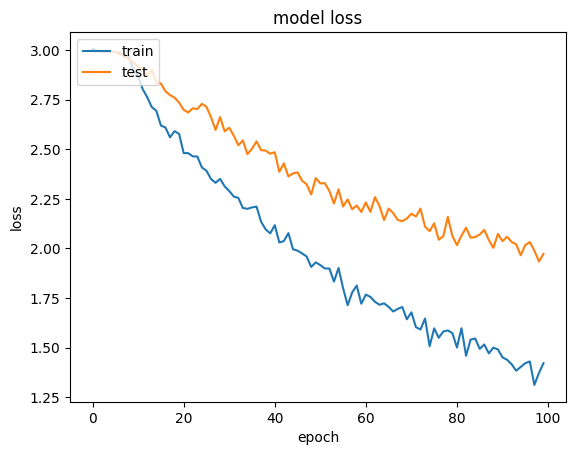

In [ ]:
#plot the model loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Attempt 3**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#preprocessing
train_datagen1 = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   # randomly shift images
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='nearest',
                                   validation_split = 0.2,
                                   )

test_datagen1 = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.2)

In [ ]:
# Extract features for each image
training_set1 = train_datagen1.flow_from_directory(datasetDir,
                                       target_size=(160, 160),
                                                batch_size=32,
                                       color_mode='grayscale',
                                     class_mode='categorical',
                                            subset='training')

validation_set1 = test_datagen1.flow_from_directory(datasetDir,
                                        target_size=(160, 160),
                                                 batch_size=32,
                                      class_mode='categorical',
                                        color_mode='grayscale',
                                               shuffle = False,
                                           subset='validation')

Found 896 images belonging to 20 classes.
Found 217 images belonging to 20 classes.


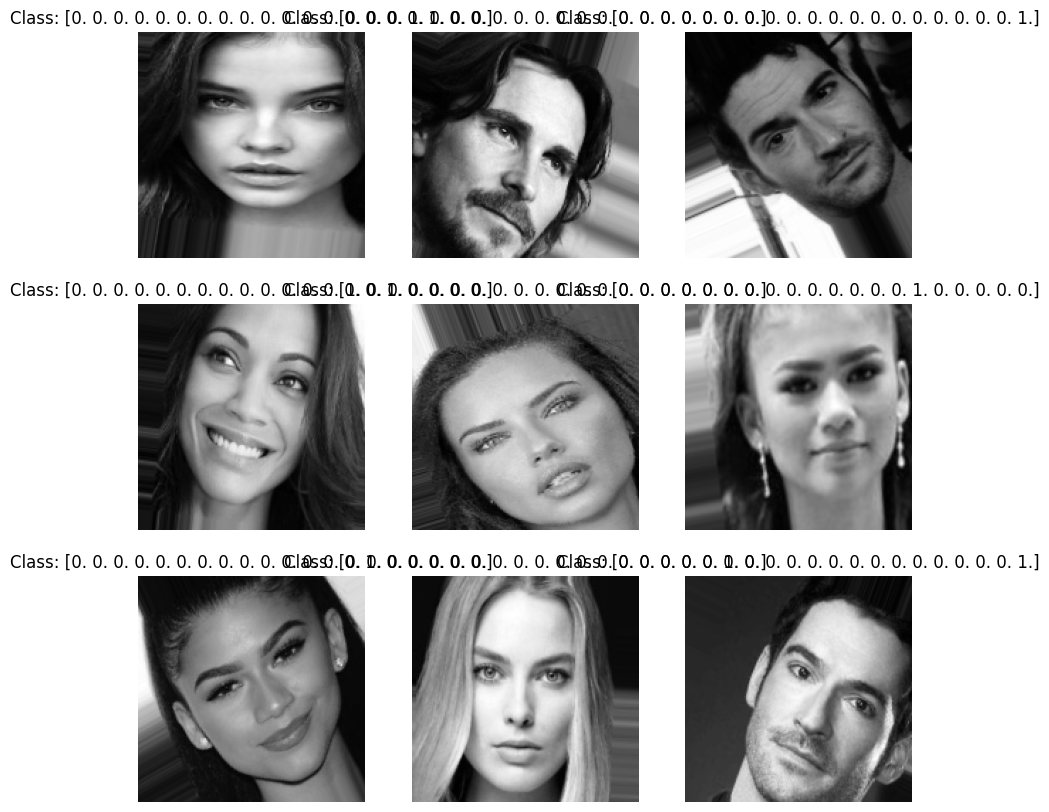

In [ ]:
# Show preprocessed images from the training set
images, labels2 = next(training_set1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(160, 160), cmap='gray')  # Reshape grayscale image
    plt.title(f'Class: {labels2[i]}')
    plt.axis('off')
plt.show()

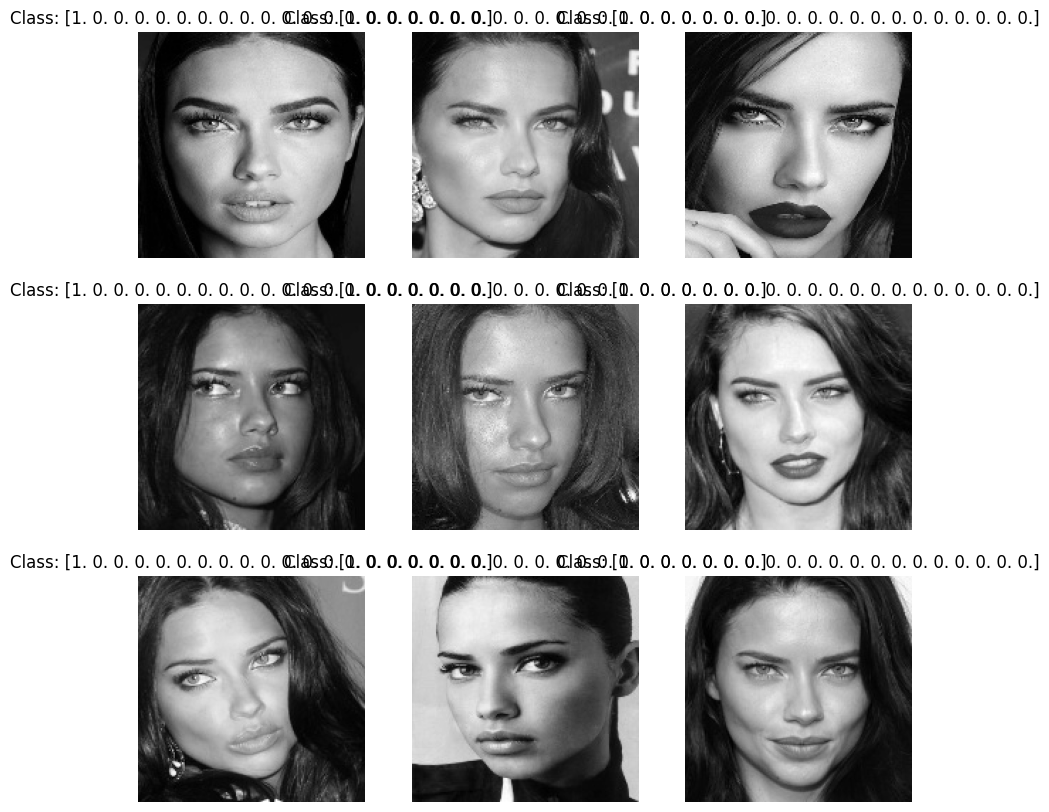

In [ ]:
# Show preprocessed images from the test set
images1, labels3 = next(validation_set1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images1[i].reshape(160, 160), cmap='gray')  # Reshape grayscale image
    plt.title(f'Class: {labels3[i]}')
    plt.axis('off')
plt.show()

In [ ]:
num_classes = 20
# Define the CNN model
CNNmodel2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 1)),
    Dropout(0.1),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.09))  # Output layer with the number of classes
])

In [ ]:
# Compile the model

CNNmodel2.compile(optimizer=Adam(learning_rate=0.0010), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history2 = CNNmodel2.fit(training_set1,
                    steps_per_epoch= len(training_set1),
                    epochs=120,
                    verbose=1,
                    validation_data=validation_set1,
                    validation_steps = len(validation_set1))

Epoch 1/120
28/28 [==============================] - 7s 126ms/step - loss: 5.9305 - accuracy: 0.0781 - val_loss: 5.2770 - val_accuracy: 0.0415
Epoch 2/120
28/28 [==============================] - 4s 142ms/step - loss: 4.8707 - accuracy: 0.1060 - val_loss: 4.6393 - val_accuracy: 0.0645
Epoch 3/120
28/28 [==============================] - 3s 106ms/step - loss: 4.2720 - accuracy: 0.1384 - val_loss: 4.1741 - val_accuracy: 0.0783
Epoch 4/120
28/28 [==============================] - 3s 119ms/step - loss: 3.7719 - accuracy: 0.1853 - val_loss: 3.8365 - val_accuracy: 0.0507
Epoch 5/120
28/28 [==============================] - 4s 138ms/step - loss: 3.3673 - accuracy: 0.1886 - val_loss: 3.5898 - val_accuracy: 0.0553
Epoch 6/120
28/28 [==============================] - 3s 107ms/step - loss: 3.1842 - accuracy: 0.2009 - val_loss: 3.4380 - val_accuracy: 0.0968
Epoch 7/120
28/28 [==============================] - 4s 126ms/step - loss: 2.8546 - accuracy: 0.2545 - val_loss: 3.2356 - val_accuracy: 0.1429

In [ ]:
score2 = CNNmodel2.evaluate(validation_set1, verbose=0)
print('Test Loss:', score2[0])
print('Test Accuracy:', score2[1])

Test Loss: 1.1084389686584473
Test Accuracy: 0.7050691246986389


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


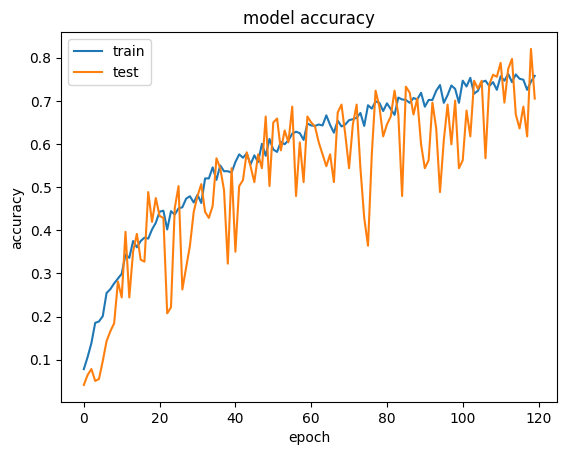

In [ ]:
#plot the model accuracy
print(history2.history.keys())
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

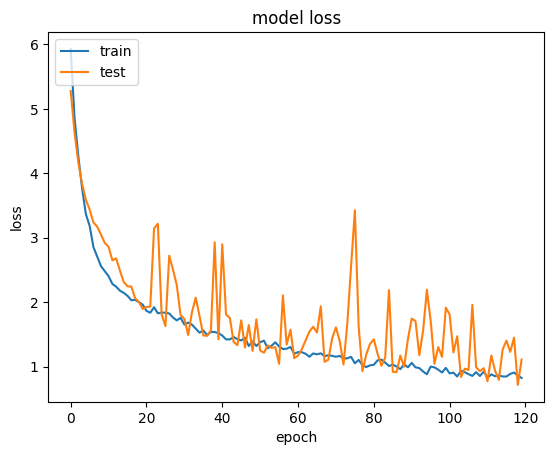

In [ ]:
#plot the model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = CNNmodel2.predict(validation_set1)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class labels
true_classes = validation_set1.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

7/7 [==============================] - 0s 25ms/step


<Figure size 1000x800 with 0 Axes>

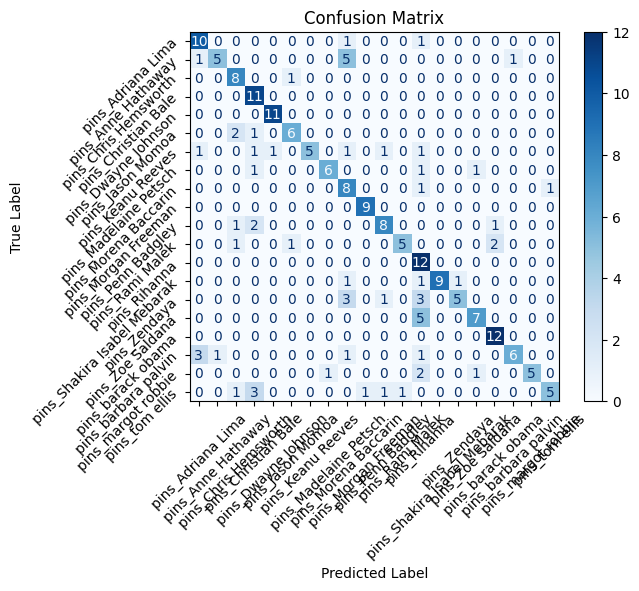

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_set1.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

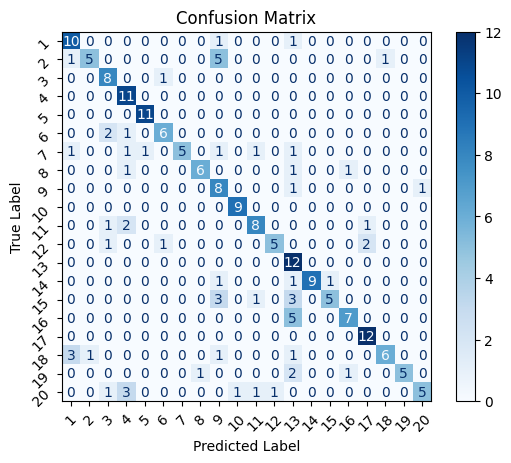

In [ ]:
# Plot confusion matrix with a numerical label
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# Compute TP, FP, TN, FN from the confusion matrix
TP = cm.diagonal()
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

# Calculate precision, recall, FPR, FNR
precision = TP / (TP + FP)
recall = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print("Precision:", np.round(precision,2))
print("Recall:", np.round(recall,2))
print("False Positive Rate (FPR):", np.round(FPR,2))
print("False Negative Rate (FNR):", np.round(FNR,2))


Precision: [0.67 0.83 0.62 0.58 0.92 0.75 1.   0.86 0.4  0.9  0.73 0.83 0.43 1.
 0.83 0.78 0.8  0.86 1.   0.83]
Recall: [0.83 0.42 0.89 1.   1.   0.67 0.45 0.67 0.8  1.   0.67 0.56 1.   0.75
 0.42 0.58 1.   0.5  0.56 0.42]
False Positive Rate (FPR): [0.02 0.   0.02 0.04 0.   0.01 0.   0.   0.06 0.   0.01 0.   0.08 0.
 0.   0.01 0.01 0.   0.   0.  ]
False Negative Rate (FNR): [0.17 0.58 0.11 0.   0.   0.33 0.55 0.33 0.2  0.   0.33 0.44 0.   0.25
 0.58 0.42 0.   0.5  0.44 0.58]


In [ ]:
# Calculate average precision, recall, FPR, FNR
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
mean_FPR = np.mean(FPR)
mean_FNR = np.mean(FNR)

print("Average Precision:",  np.round(avg_precision,2))
print("Average Recall:", np.round(avg_recall,2))
print("Mean False Positive Rate (FPR):", np.round(mean_FPR,2))
print("Mean False Negative Rate (FNR):", np.round(mean_FNR,2))

Average Precision: 0.78
Average Recall: 0.71
Mean False Positive Rate (FPR): 0.02
Mean False Negative Rate (FNR): 0.29
